In [19]:
from core import dataset_handling
from core.PolyaGammaLogitClassifier import PolyaGammaLogitClassifier

In [32]:
# Creating toy dataset with 100 samples, 10 dimensions,
# 2 of which have a linear dependency
data_set = dataset_handling.load_toy_data(n=500, d=20, non_zeros=3)

X_test, y_test = data_set['test']
X_train, y_train = data_set['train']

Creating Data with Kernel_params: lin:-3, rbf_var:-2, l_s:-1.5, white:-4.605170185988091


In [43]:
# Creating learner with 50 inducing points, the kernel Parameters log(-1), log(-1)
# and the length scale is set automatically to the median distance between training points
# The prior on the linear weights is a Laplace prior with Mean Field approximation
# The variance for the prior on the weights is set with pw_var
learner = PolyaGammaLogitClassifier(data_set=data_set, n_ind_points=50,
                                    lin_kernel=-2, rbf_kernel=-2, white_kernel=-3, length_scale='auto',
                                    qw_type='Laplace MF', epoch_lim=200, pw_var=4E-1, map_pred=True)

info = learner.fit(X_test=X_test, y_test=y_test)

Init learner: Laplace MF on Toy with s:500, #ind:50 and epoch lim: 200 data-dim:(20, 500)
finding inducing points
Automatically finding ls
Automatic length_scale set to 3.6600472254606826
Initializing dist params
Updating kernel
Initializing rest of variables
Epoch...''Epoch   1 || ELBO +1.5424E+02 (+INF) 
Epoch...''Epoch   2 || ELBO +1.7085E+02 (+1.6609E+01) 
Epoch...''Epoch   3 || ELBO +1.8142E+02 (+1.0572E+01) 
Epoch...''Epoch   4 || ELBO +1.8460E+02 (+3.1807E+00) 
Epoch...''Epoch   5 || ELBO +1.8570E+02 (+1.1044E+00) 
Epoch...''Epoch   6 || ELBO +1.8617E+02 (+4.6527E-01) 
Epoch...''Epoch   7 || ELBO +1.8642E+02 (+2.5288E-01) 
Epoch...''Epoch   8 || ELBO +1.8659E+02 (+1.7259E-01) 
Epoch...''Epoch   9 || ELBO +1.8673E+02 (+1.3450E-01) 
Epoch...''Epoch  10 || ELBO +1.8684E+02 (+1.1154E-01) 
Epoch...''Epoch  11 || ELBO +1.8694E+02 (+9.5734E-02) 
Epoch...''Epoch  12 || ELBO +1.8702E+02 (+8.4594E-02) 
Epoch...''Epoch  13 || ELBO +1.8710E+02 (+7.7056E-02) 
Epoch...''Epoch  14 || ELBO +1.8

Epoch...''Epoch 146 || ELBO +1.9534E+02 (+6.4571E-05) 
Epoch...''Epoch 147 || ELBO +1.9534E+02 (+6.3529E-05) 
Epoch...''Epoch 148 || ELBO +1.9534E+02 (+6.2509E-05) 
Epoch...''Epoch 149 || ELBO +1.9534E+02 (+6.1512E-05) 
Epoch...''Epoch 150 || ELBO +1.9534E+02 (+6.0535E-05) 
Epoch...''Epoch 151 || ELBO +1.9534E+02 (+5.9580E-05) 
Epoch...''Epoch 152 || ELBO +1.9534E+02 (+5.8644E-05) 
Epoch...''Epoch 153 || ELBO +1.9534E+02 (+5.7728E-05) 
Epoch...''Epoch 154 || ELBO +1.9534E+02 (+5.6832E-05) 
Epoch...''Epoch 155 || ELBO +1.9534E+02 (+5.5954E-05) 
Epoch...''Epoch 156 || ELBO +1.9534E+02 (+5.5094E-05) 
Epoch...''Epoch 157 || ELBO +1.9534E+02 (+5.4252E-05) 
Epoch...''Epoch 158 || ELBO +1.9534E+02 (+5.3428E-05) 
Epoch...''Epoch 159 || ELBO +1.9534E+02 (+5.2620E-05) 
Epoch...''Epoch 160 || ELBO +1.9534E+02 (+5.1829E-05) 
Epoch...''Epoch 161 || ELBO +1.9534E+02 (+5.1053E-05) 
Epoch...''Epoch 162 || ELBO +1.9534E+02 (+5.0294E-05) 
Epoch...''Epoch 163 || ELBO +1.9534E+02 (+4.9549E-05) 
Epoch...''

In [44]:
# Train Score
learner.score(X=X_train, y=y_train, print_out=False)

,Laplace MF,only GP Laplace MF,only w Laplace MF
Acc.,0.918000,0.918000,0.914000
F1,0.917905,0.917905,0.913900
Log Conf,-0.195774,-0.196157,-0.655422
ROC AUC,0.977066,0.977002,0.974441
bin. Prec.,0.932489,0.932489,0.928270
bin. Recall,0.898374,0.898374,0.894309


In [45]:
# Test Score
learner.score(X=X_test, y=y_test, print_out=False)

,Laplace MF,only GP Laplace MF,only w Laplace MF
Acc.,0.900000,0.900000,0.900000
F1,0.899749,0.899749,0.899749
Log Conf,-0.225500,-0.225496,-0.658635
ROC AUC,0.969752,0.969451,0.969952
bin. Prec.,0.896226,0.896226,0.896226
bin. Recall,0.913462,0.913462,0.913462


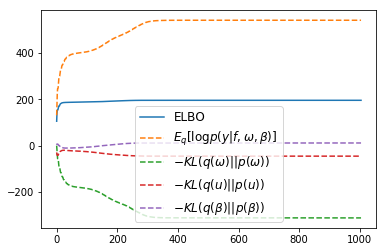

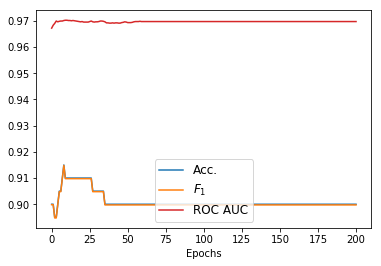

In [46]:
# Plot ELBO and Scoring over the iterations
from core import plotting
plotting.eval_plots(learner)

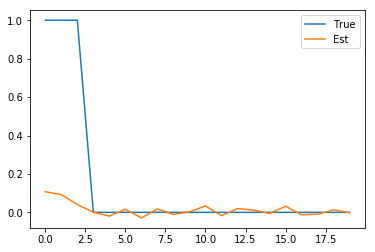

In [47]:
# Compare Estimated underlying weights with real weights
import matplotlib.pyplot as plt
plt.plot(data_set['w_true'], label='True')
plt.plot(learner.get_expected_w(), label='Est')
plt.legend()
plt.show()